In [1]:
# Author: Elahe Golrokh
# Repo:

In [2]:
import ast
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns

from collections import Counter
from wordcloud import WordCloud


In [ ]:
from google.colab import files
files.upload()

In [4]:
df_features = pd.read_csv('df_features.csv')
df_features.head()

,job_title,seniority_level,status,company,location,headquarter,industry,ownership,company_size,revenue,skills,min_salary,max_salary,mean_salary
0,data scientist,senior,hybrid,company_003,United States,United States,Retail,Public,NaN,3.524400e+11,"['spark', 'r', 'python', 'scala', 'machine lea...",100472.0,200938.0,150705.0
1,data scientist,lead,hybrid,company_005,United States,United States,Manufacturing,Public,155030.0,5.110000e+10,"['spark', 'r', 'python', 'sql', 'machine learn...",118733.0,118733.0,118733.0
2,data scientist,senior,on-site,company_007,multi-location,United States,Technology,Public,25930.0,3.380000e+10,"['aws', 'git', 'python', 'docker', 'sql', 'mac...",94987.0,159559.0,127273.0
3,data scientist,senior,hybrid,company_008,multi-location,United States,Technology,Public,34690.0,8.171000e+10,"['sql', 'r', 'python']",112797.0,194402.0,153599.5
4,data scientist,NaN,on-site,company_009,United States,United States,Finance,Private,1800.0,NaN,[],114172.0,228337.0,171254.5


# **General Stats**

In [5]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938 entries, 0 to 937
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   job_title        935 non-null    object 
 1   seniority_level  880 non-null    object 
 2   status           685 non-null    object 
 3   company          938 non-null    object 
 4   location         938 non-null    object 
 5   headquarter      938 non-null    object 
 6   industry         938 non-null    object 
 7   ownership        906 non-null    object 
 8   company_size     900 non-null    float64
 9   revenue          421 non-null    float64
 10  skills           938 non-null    object 
 11  min_salary       938 non-null    float64
 12  max_salary       938 non-null    float64
 13  mean_salary      938 non-null    float64
dtypes: float64(5), object(9)
memory usage: 102.7+ KB


In [6]:
df_features.isnull().sum()

,0
job_title,3
seniority_level,58
status,253
company,0
location,0
headquarter,0
industry,0
ownership,32
company_size,38
revenue,517


In [7]:
df_features.describe(include='all')

,job_title,seniority_level,status,company,location,headquarter,industry,ownership,company_size,revenue,skills,min_salary,max_salary,mean_salary
count,935,880,685,938,938,938,938,906,900.000000,4.210000e+02,938,9.380000e+02,9.380000e+02,9.380000e+02
unique,4,4,3,417,7,5,8,2,NaN,NaN,399,NaN,NaN,NaN
top,data scientist,senior,on-site,company_134,United States,United States,Technology,Public,NaN,NaN,[],NaN,NaN,NaN
freq,853,627,363,30,566,768,576,579,NaN,NaN,196,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97825.651111,1.645563e+11,NaN,1.144924e+05,1.489748e+05,1.317336e+05
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185069.173560,2.159307e+11,NaN,1.265327e+05,1.343738e+05,1.290955e+05
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,9.133300e+08,NaN,4.055000e+03,7.678000e+03,7.055000e+03
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1795.000000,2.653000e+10,NaN,6.841600e+04,8.237150e+04,7.646000e+04
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20335.000000,8.220000e+10,NaN,1.104005e+05,1.512265e+05,1.347225e+05
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94570.000000,2.303700e+11,NaN,1.461390e+05,2.009360e+05,1.697328e+05


# **Utils**

## Helper Functions

In [8]:
def remove_outliers(df: pd.DataFrame, col: str, q: float) -> pd.DataFrame:
  """Removes outliers based on passed quantile"""
  if q > .5:
    df = df[df[col] <= df[col].quantile(q)]
  else:
    df = df[df[col] >= df[col].quantile(q)]
  return df

## Plot's Functions

In [9]:
def plot_numerical_histogram(df: pd.DataFrame,
                             col: str,
                             x_label: str,
                             title: str,
                             ):
  plt.rcParams["font.size"] = 14
  fig, (ax_hist, ax_box) = plt.subplots(
      2, sharex=True, gridspec_kw={"height_ratios": (0.85, 0.15)}, figsize=(16, 8)
  )
  # boxplot (seaborn)
  sns.boxplot(x=df[col], color="gray", ax=ax_box)
  ax_box.set(xlabel="")
  # histogram (matplotlib)
  ax_hist.hist(df[col], bins=40, density=True, color="gray")
  # kde plot (pandas series)
  min_, max_ = plt.xlim()
  plt.xlim(min_, max_)

  ax_hist.set_title(
      title,
      weight="bold",
      color="gray",
      fontsize=18,
      loc="left",
  )

  ax_hist.set_xlabel(x_label, loc="left", weight="bold", fontsize=14, color="gray")

  ax_hist.set_ylabel(
      "Density",
      loc="bottom",
      weight="bold",
      fontsize=14,
      color="gray",
  )

  ax_box.spines[["right", "top", "left", "bottom"]].set_visible(False)

  ax_hist.spines[["right", "top"]].set_visible(False)
  ax_hist.ticklabel_format(axis="x", style="plain")
  ax_hist.tick_params(axis="x", colors="gray", labelsize="large")
  ax_hist.tick_params(axis="y", colors="gray", labelsize="large")

  df[col].plot.kde(color="lightcoral", linewidth=3, ax=ax_hist)

  plt.tight_layout()
  plt.show()

In [10]:
def plot_grouped_barplot(df: pd.DataFrame,
                         cols: list[str]=None,
                         x_label: str=None,
                         title: str='',
                         width=0.8,
                         annotate="values",
                         ax=None,
                         figsize=None,
                         rotation_angle: int=None,
                         **kw):
    # data preparation
    counts_df = df.groupby(cols).size().unstack().copy()
    # convert counts to percentages
    for i in counts_df.index:
      for col in counts_df.columns:
        counts_df.loc[i] = np.round(100*(counts_df.loc[i]/counts_df.loc[i, :].sum()), 1)
    # plot
    if figsize:
      plt.figure(figsize=figsize)
    ax = ax or plt.gca()
    n = len(counts_df.columns)
    w = 1./n
    pos = (np.linspace(w/2., 1-w/2., n)-0.5)*width
    w *= width
    bars = []
    for col, x in zip(counts_df.columns, pos):
        bars.append(ax.bar(np.arange(len(counts_df))+x, counts_df[col].values, width=w, label=col, **kw))
        for val, xi in zip(counts_df[col].values, np.arange(len(counts_df))+x):
            if annotate:
                txt = str(val)+'%' if annotate == "values" else col
                ax.annotate(txt, xy=(xi, val), xytext=(0,2),
                            textcoords="offset points",
                            ha="center", va="bottom", color='gray')
    ax.set_xticks(np.arange(len(counts_df)))
    ax.set_xticklabels(counts_df.index)
    ax.set_title(
        title,
        pad=30,
        weight="bold",
        color="gray",
        fontsize=12,
        loc="left",
    )

    ax.set_xlabel(x_label, loc="left", weight="bold", fontsize=12, color='#585858')

    ax.spines[["right", "top"]].set_visible(False)

    ax.tick_params(axis="x", colors="gray", labelsize="medium")
    ax.tick_params(left=False)

    if rotation_angle:
      plt.xticks(rotation=rotation_angle)
    plt.rc('axes',edgecolor='gray')

    plt.tight_layout()
    ax.legend()
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.show()
    return bars

In [11]:
def plot_boxplot(df: pd.DataFrame,
                 cols: list[str]=None,
                 x_label: str=None,
                 y_label: str=None,
                 title: str='',
                 width=0.8,
                 ax=None,
                 figsize=None,
                 rotation_angle: int=None,
                 color: str='#E8B4BC',
                 **kw):
  if figsize:
      plt.figure(figsize=figsize)
  ax = ax or plt.gca()
  sns.boxplot(df, x=cols[0], y=cols[1], color=color)
  ax.set_title(title,
              pad=30,
              weight="bold",
              color="gray",
              fontsize=12,
              loc="left",)

  ax.set_xlabel(x_label, loc="left", weight="bold", fontsize=12, color='#585858')
  ax.set_ylabel(y_label, loc="top", weight="bold", fontsize=12, color='#585858')

  ax.spines[["right", "top"]].set_visible(False)

  ax.tick_params(axis="x", colors="gray", labelsize="medium")
  ax.tick_params(left=False)

  if rotation_angle:
    plt.xticks(rotation=rotation_angle)
  plt.rc('axes',edgecolor='gray')

  plt.tight_layout()
  ax.legend()
  sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
  plt.show()

In [12]:
def plot_wordcloud(df: pd.DataFrame,
                   col: str,
                   tite: str,
                   color: str='#58A0C8'):

  # Count the occurrences of each unique value
  industry_counts = df[col].value_counts()

  # Create a dictionary from value counts
  words = industry_counts.to_dict()
  f, ax = plt.subplots(figsize=(16, 8))
  # Generate the word cloud
  wordcloud = WordCloud(width=550, height=300, background_color='black',
                        max_words=1628, relative_scaling=0.7,
                        color_func=lambda *args, **kwargs: color, # Set color_func to a single color
                        normalize_plurals=False)
  wordcloud.generate_from_frequencies(words)

  # Display the word cloud
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis('off')
  plt.title(tite)
  plt.show()

In [13]:
def label_function(val):
    return f'{val:.0f}%'

In [14]:
colors=['#F5E3E0', '#E8B4BC', '#D282A6', '#6E4555', '#3A3238', '#63595C', '#F0EDEE']

# **EDA**

<Axes: >

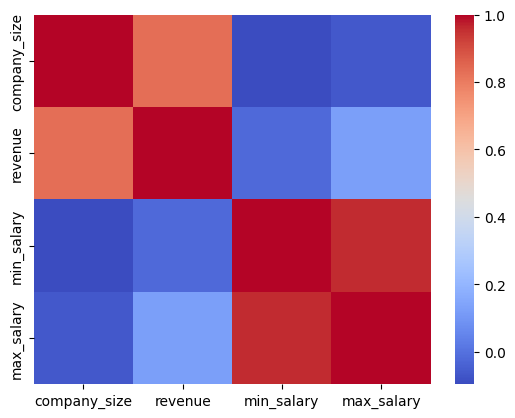

In [15]:
sns.heatmap(df_features[['company_size',	'revenue',	'min_salary',	'max_salary']].corr(), cmap='coolwarm')

## **Univariate**

### Numerical Features

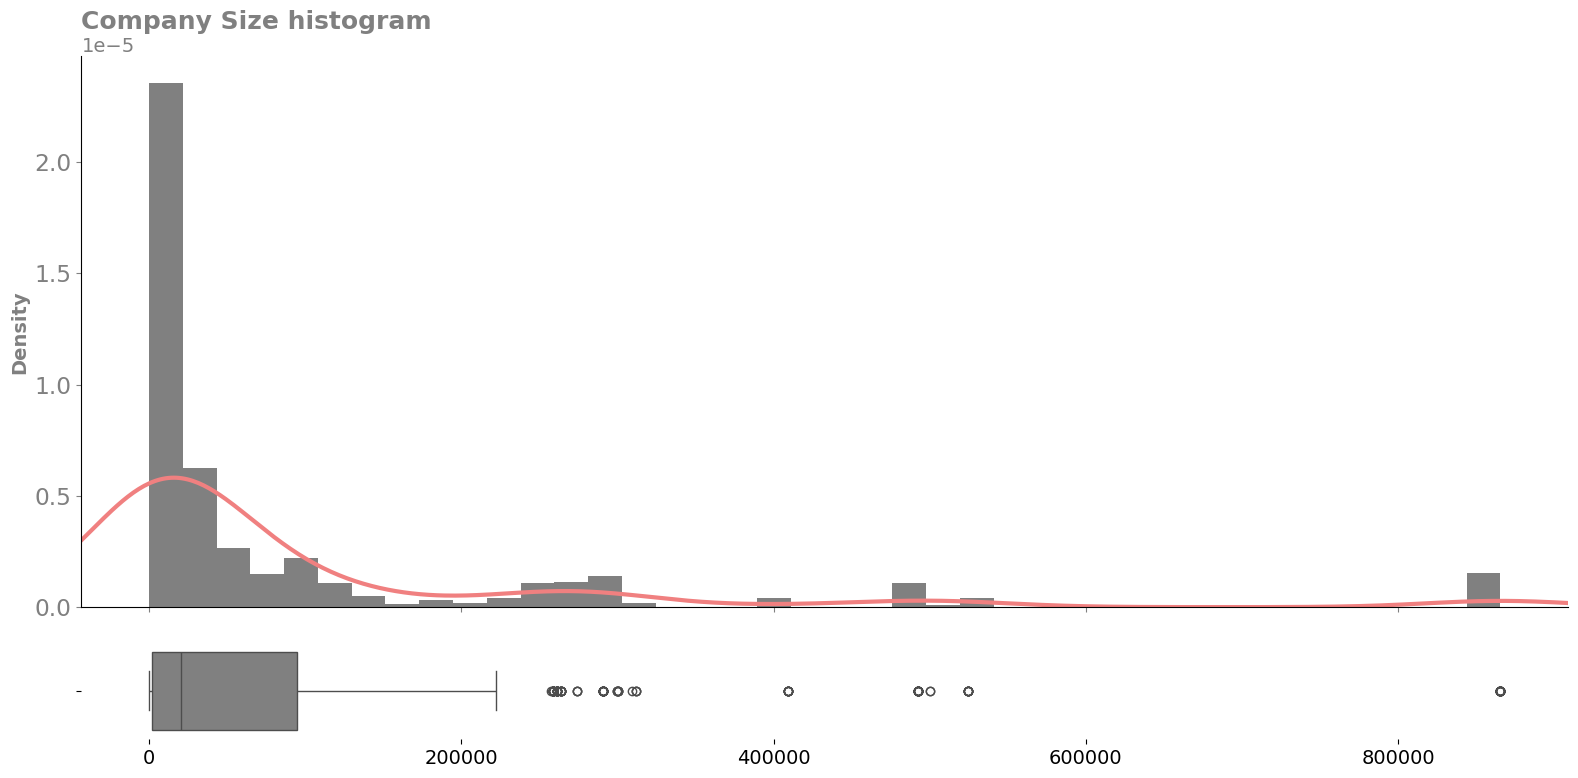

In [16]:
plot_numerical_histogram(df=df_features,
                         col="company_size",
                         x_label="Company Size",
                         title="Company Size histogram",
                         )

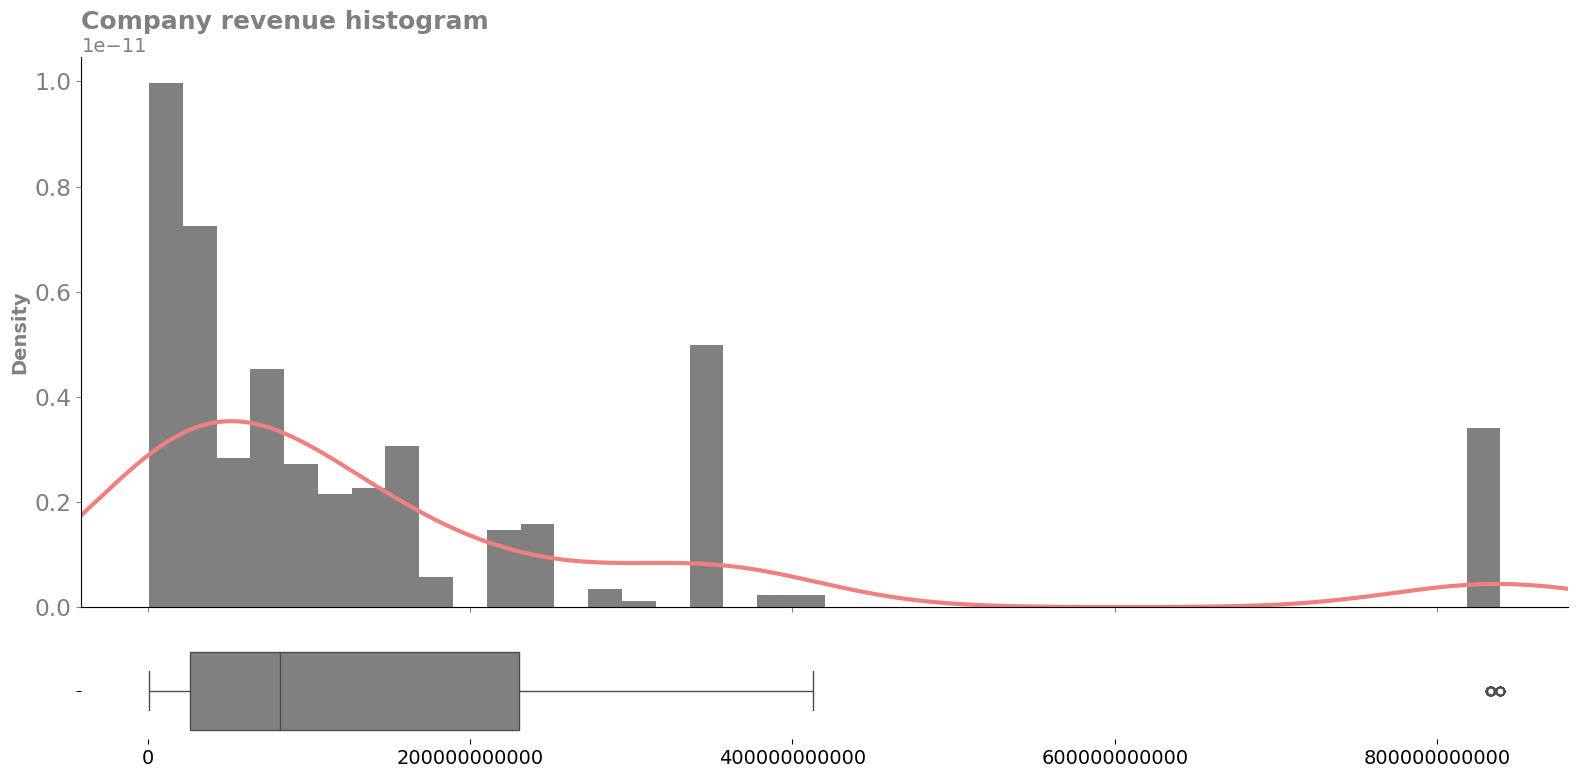

In [17]:
plot_numerical_histogram(df=df_features,
                         col="revenue",
                         x_label="Company revenue",
                         title="Company revenue histogram",
                         )

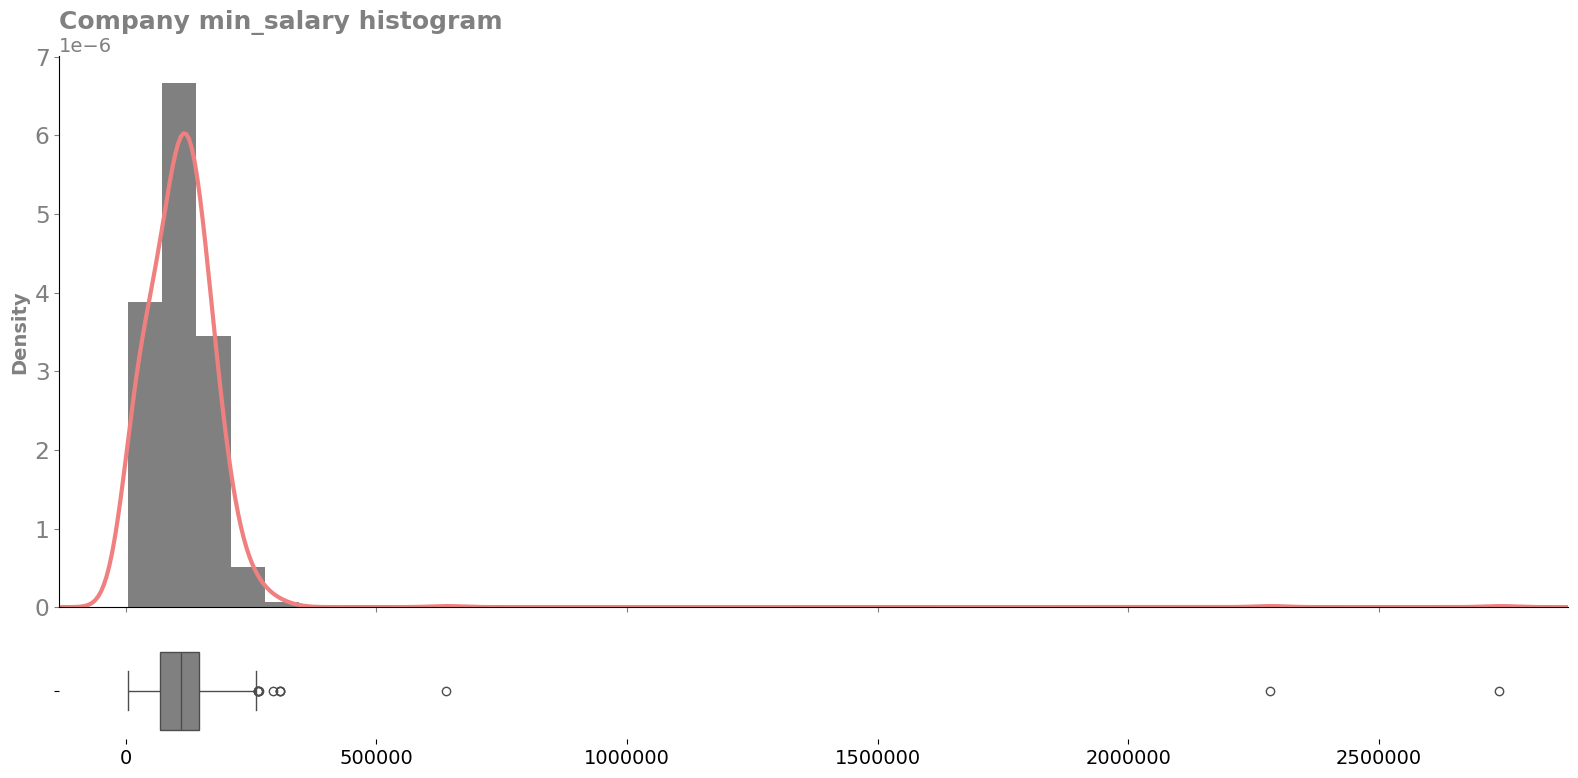

In [18]:
plot_numerical_histogram(df=df_features,
                         col="min_salary",
                         x_label="Company min_salary",
                         title="Company min_salary histogram",
                         )

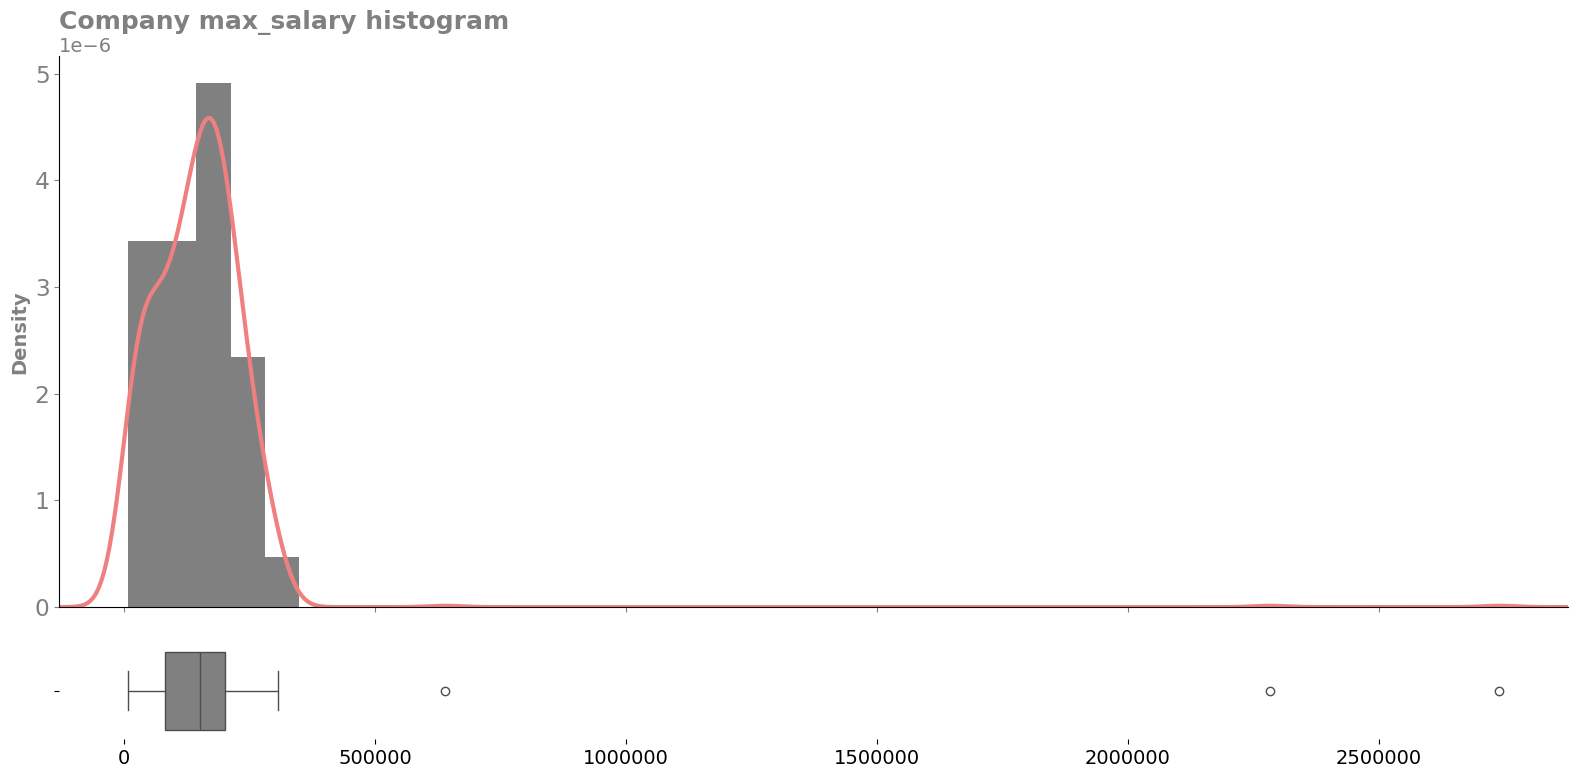

In [19]:
plot_numerical_histogram(df=df_features,
                         col="max_salary",
                         x_label="Company max_salary",
                         title="Company max_salary histogram",
                         )

### Categorical Features

In [20]:
df_features.columns

Index(['job_title', 'seniority_level', 'status', 'company', 'location',
       'headquarter', 'industry', 'ownership', 'company_size', 'revenue',
       'skills', 'min_salary', 'max_salary', 'mean_salary'],
      dtype='object')

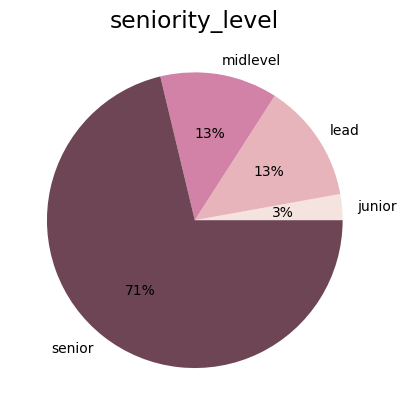

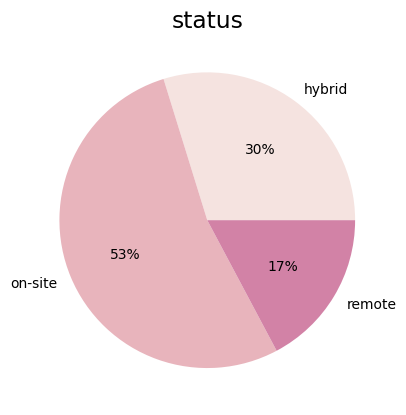

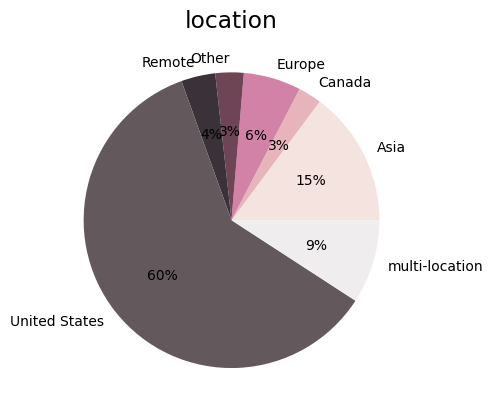

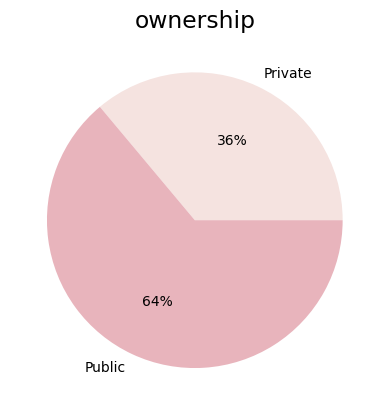

In [21]:
pie_columns = ['seniority_level', 'status', 'location', 'ownership']

for col in pie_columns:
  df_features.groupby(col).size().plot(kind='pie',
                              autopct=label_function,
                              textprops={'fontsize': 10},
                              colors=colors,
                              title=col)
  plt.show()

## **Bivariate**

In [22]:
df_features['ave_salary'] = (df_features['min_salary'] + df_features['min_salary'])/2

In [23]:
df_features.columns

Index(['job_title', 'seniority_level', 'status', 'company', 'location',
       'headquarter', 'industry', 'ownership', 'company_size', 'revenue',
       'skills', 'min_salary', 'max_salary', 'mean_salary', 'ave_salary'],
      dtype='object')

### Numerical Features

In [24]:
df = remove_outliers(df_features, 'ave_salary', .99)

<Axes: xlabel='company_size', ylabel='ave_salary'>

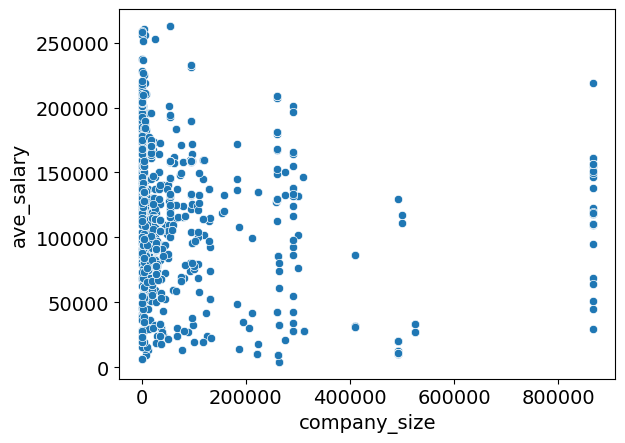

In [25]:
sns.scatterplot(data=df, x='company_size', y='ave_salary')

So there is no obvious relationship between average salary & the size of the company

### Categorical Features

In [26]:
sns.set_palette("mako")

/tmp/ipython-input-2720465570.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '43.2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  counts_df.loc[i] = np.round(100*(counts_df.loc[i]/counts_df.loc[i, :].sum()), 1)
/tmp/ipython-input-2720465570.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '47.7' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  counts_df.loc[i] = np.round(100*(counts_df.loc[i]/counts_df.loc[i, :].sum()), 1)
/tmp/ipython-input-2720465570.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9.1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  counts_df.loc[i] = np.round(100*(counts_df.loc[i]/counts

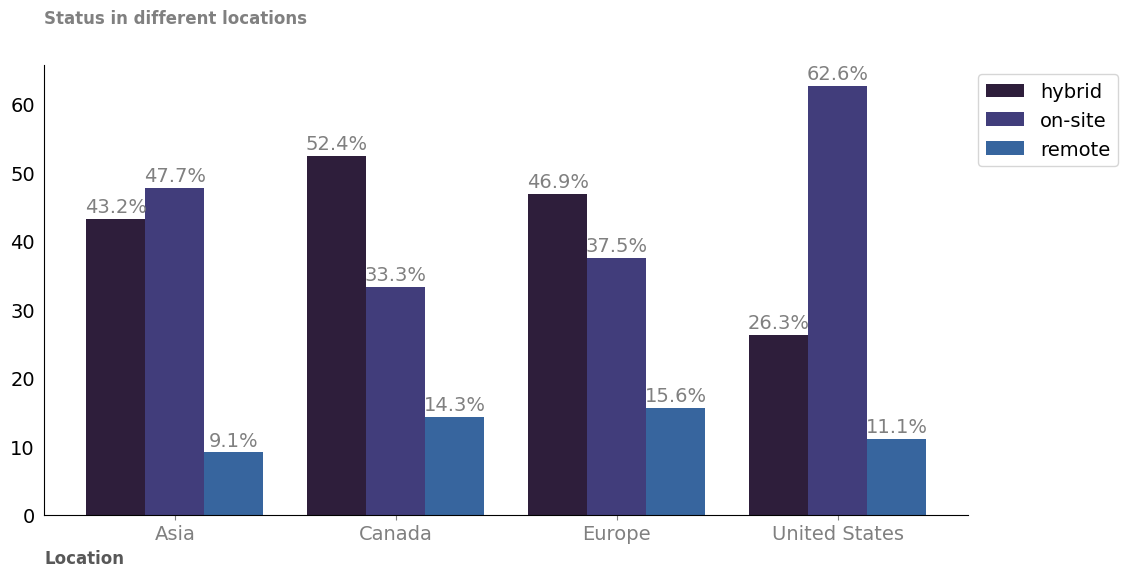

[<BarContainer object of 4 artists>,
 <BarContainer object of 4 artists>,
 <BarContainer object of 4 artists>]

In [27]:
sub_df = df_features[(df_features['location']!= 'Remote') & \
                     (df_features['location']!= 'multi-location') &
                     (df_features['location']!= 'Other')]
plot_grouped_barplot(df=sub_df,
                     cols=['location', 'status'],
                     x_label='Location',
                     title='Status in different locations',
                     width=0.8,
                     annotate="values",
                     figsize=(10, 6))

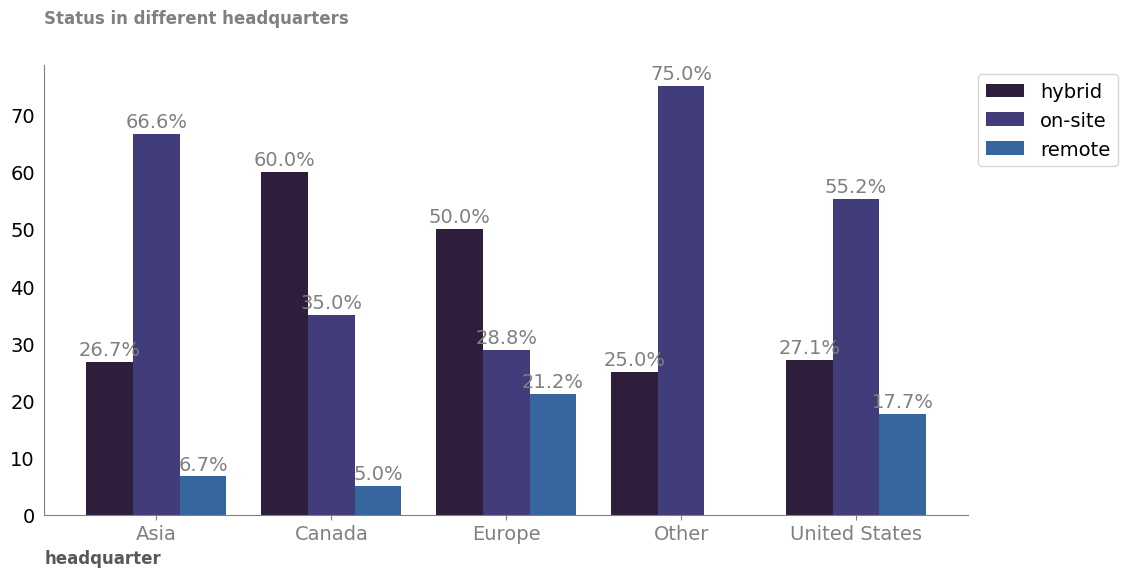

[<BarContainer object of 5 artists>,
 <BarContainer object of 5 artists>,
 <BarContainer object of 5 artists>]

In [28]:
plot_grouped_barplot(df=df_features,
                     cols=['headquarter', 'status'],
                     x_label='headquarter',
                     title='Status in different headquarters',
                     width=0.8,
                     annotate="values",
                     figsize=(10, 6))

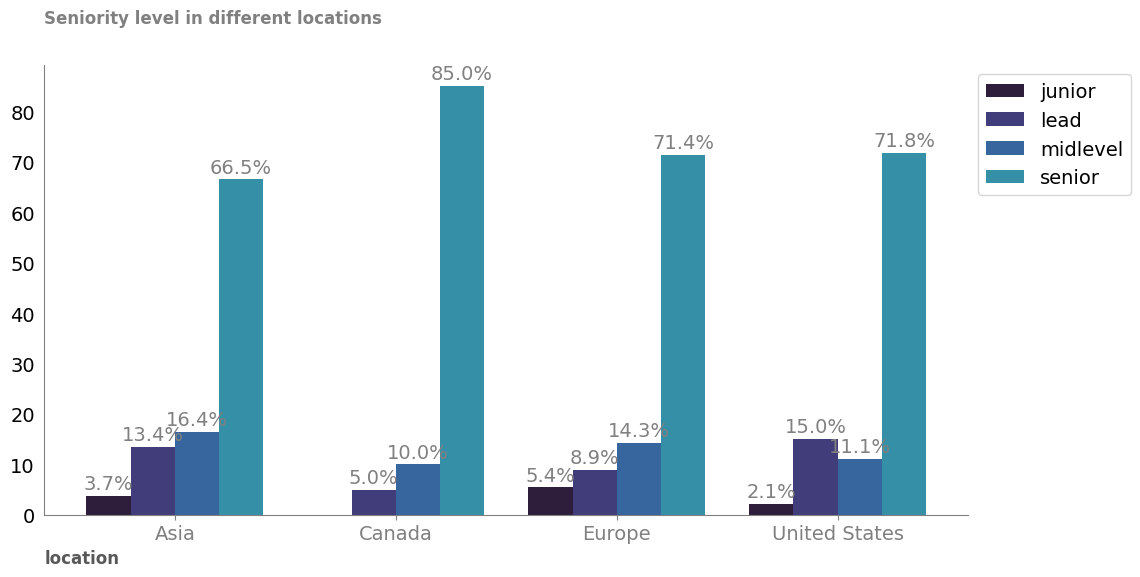

[<BarContainer object of 4 artists>,
 <BarContainer object of 4 artists>,
 <BarContainer object of 4 artists>,
 <BarContainer object of 4 artists>]

In [29]:
sub_df = df_features[(df_features['location']!= 'Remote') & \
                     (df_features['location']!= 'multi-location') &
                     (df_features['location']!= 'Other')]
plot_grouped_barplot(df=sub_df,
                     cols=['location', 'seniority_level'],
                     x_label='location',
                     title='Seniority level in different locations',
                     width=0.8,
                     annotate="values",
                     figsize=(10, 6))

### Numerical vs Categorical

/tmp/ipython-input-2442764583.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


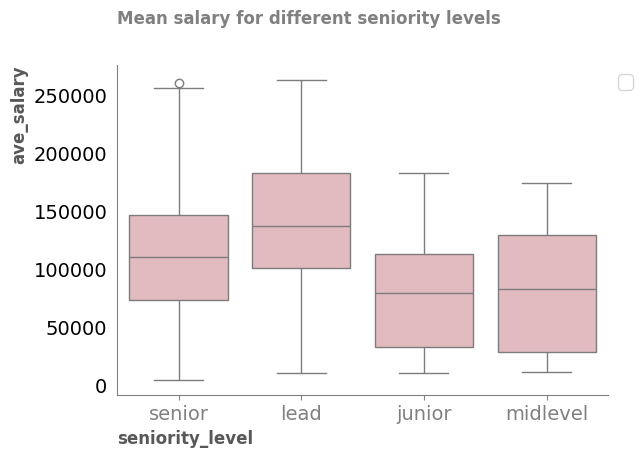

In [30]:
plot_boxplot(df,
             cols=['seniority_level', 'ave_salary'],
             x_label='seniority_level',
             y_label='ave_salary',
             title='Mean salary for different seniority levels',)

/tmp/ipython-input-2442764583.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


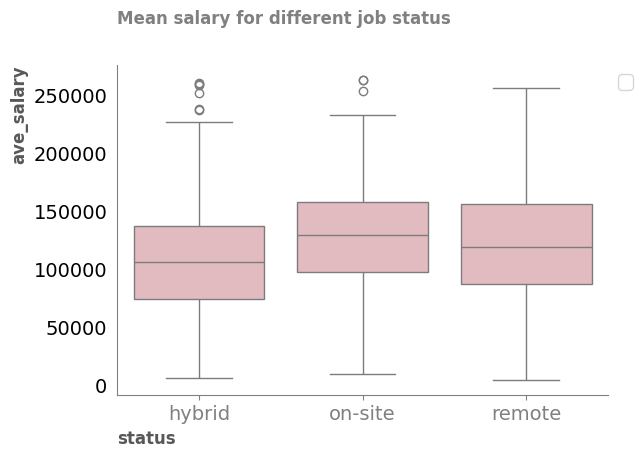

In [31]:
plot_boxplot(df,
             cols=['status', 'ave_salary'],
             x_label='status',
             y_label='ave_salary',
             title='Mean salary for different job status',)

/tmp/ipython-input-2442764583.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


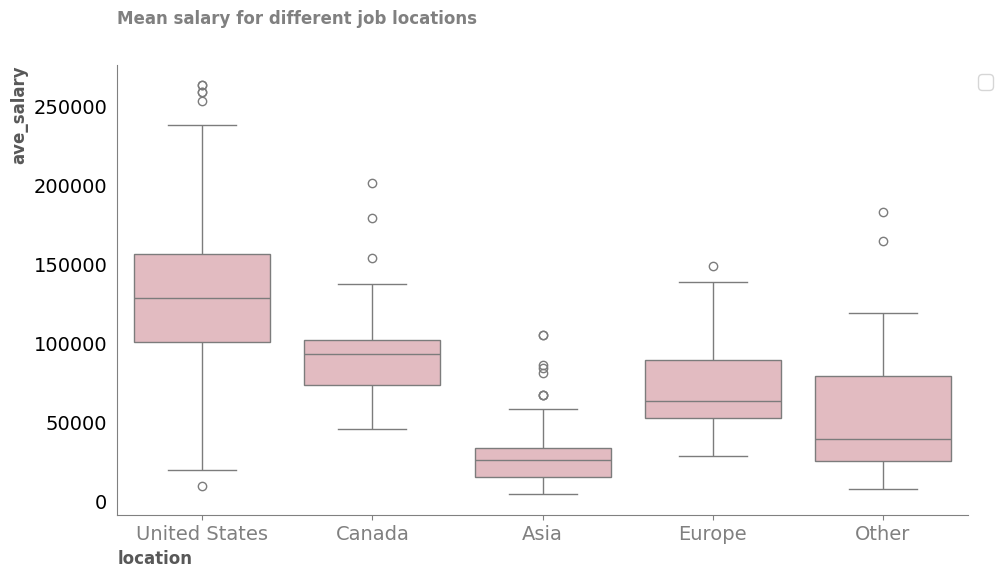

In [32]:
df = df[(df['location'] != 'multi-location') & (df['location'] != 'Remote')]
plot_boxplot(df,
             cols=['location', 'ave_salary'],
             x_label='location',
             y_label='ave_salary',
             title='Mean salary for different job locations',
             figsize=(10, 6))

/tmp/ipython-input-2442764583.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


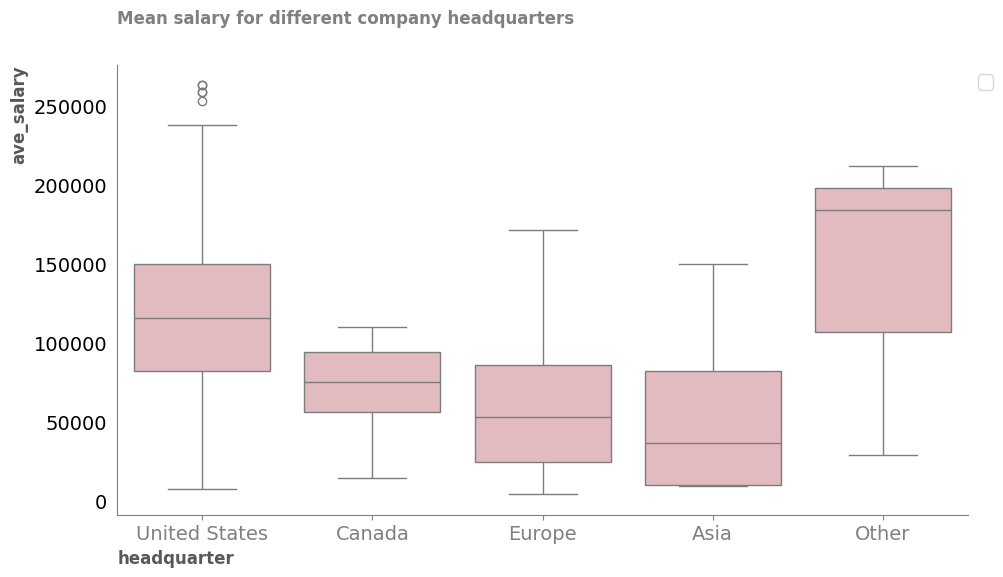

In [33]:
plot_boxplot(df,
             cols=['headquarter', 'ave_salary'],
             x_label='headquarter',
             y_label='ave_salary',
             title='Mean salary for different company headquarters',
             figsize=(10, 6))

/tmp/ipython-input-2442764583.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


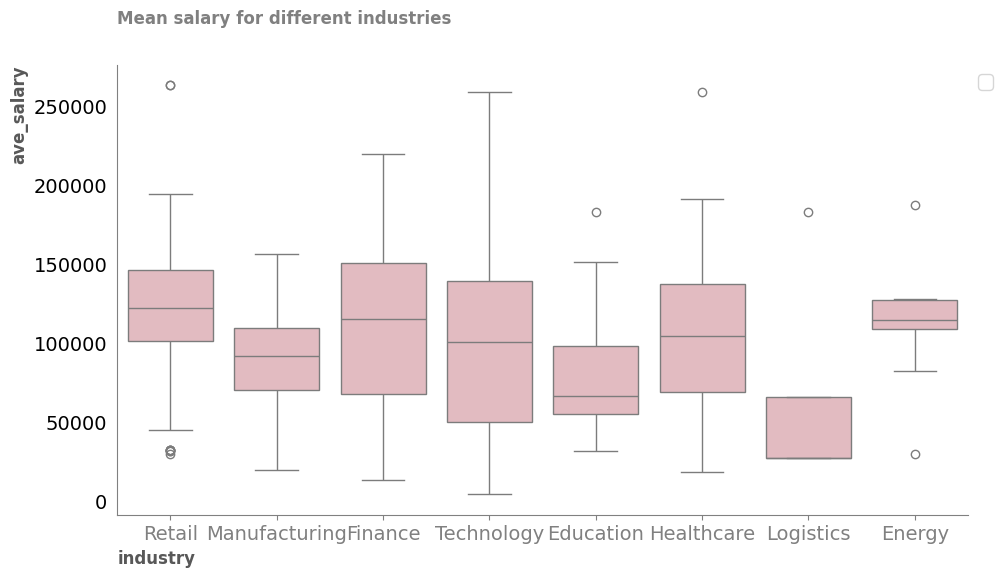

In [34]:
plot_boxplot(df,
             cols=['industry', 'ave_salary'],
             x_label='industry',
             y_label='ave_salary',
             title='Mean salary for different industries',
             figsize=(10, 6))

/tmp/ipython-input-2442764583.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


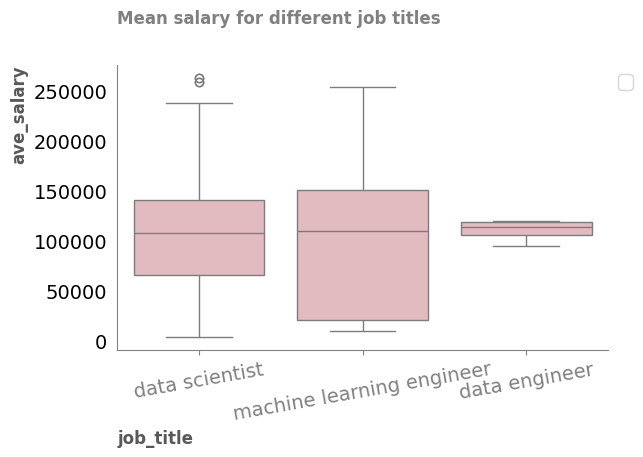

In [35]:
df = df[(df['job_title'] != 'data analyst')]

plot_boxplot(df,
             cols=['job_title', 'ave_salary'],
             x_label='job_title',
             y_label='ave_salary',
             title='Mean salary for different job titles',
             rotation_angle=10)

## **Geographic & Industry Footprint Overview**

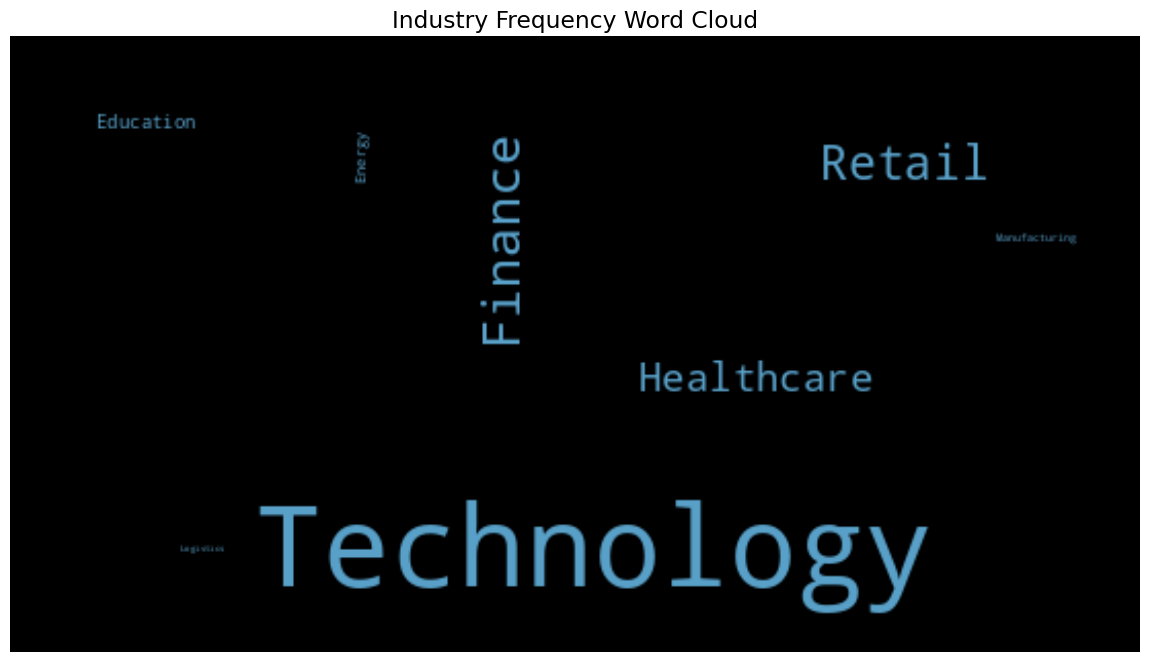

In [36]:
plot_wordcloud(df=df_features,
               col='industry',
               tite='Industry Frequency Word Cloud',
               color='#58A0C8')

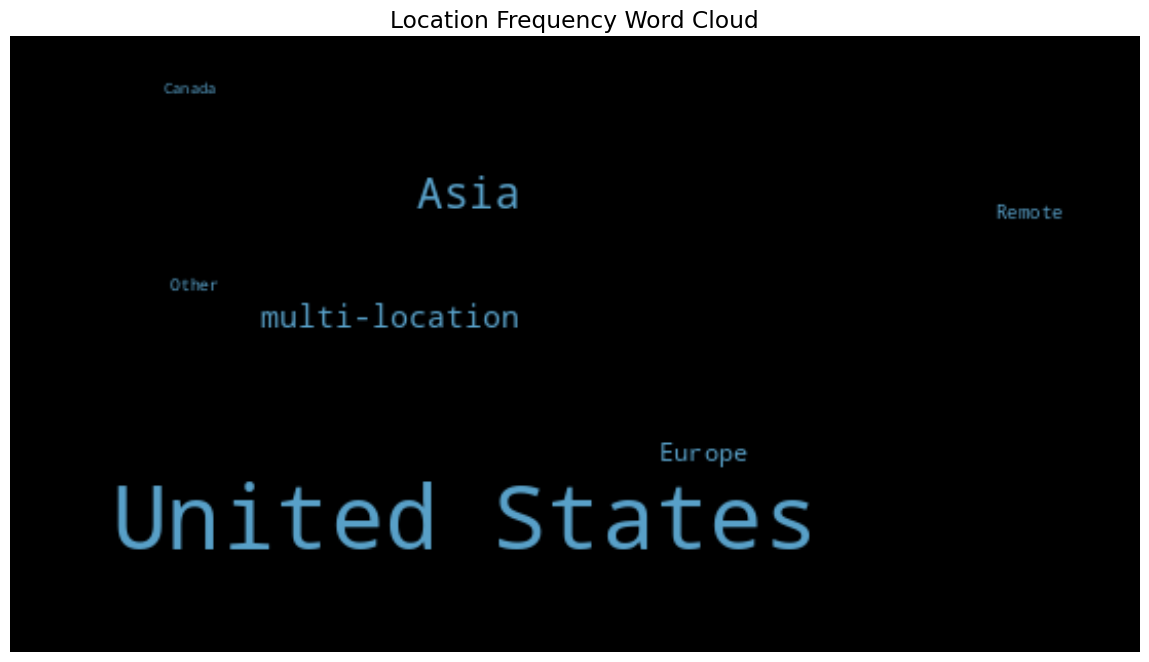

In [37]:
plot_wordcloud(df=df_features,
               col='location',
               tite='Location Frequency Word Cloud',
               color='#58A0C8')

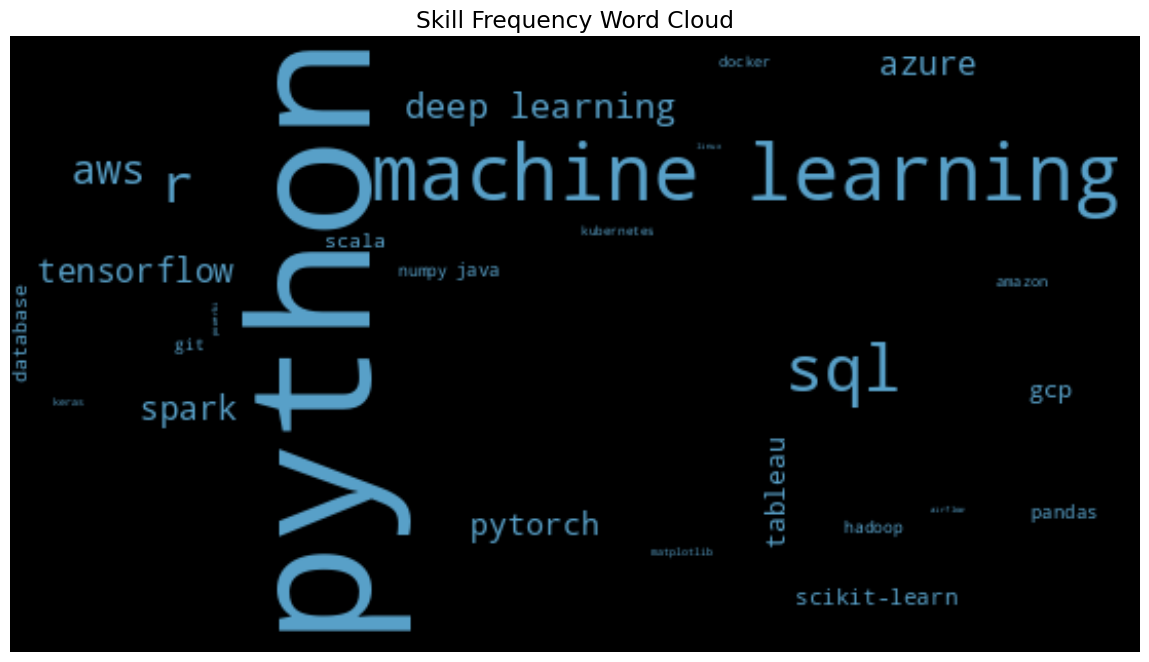

In [38]:
# Flatten the list of skills and count the frequency of each skill
all_skills = [skill for sublist in df_features['skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else []) for skill in sublist]
skill_counts = Counter(all_skills)

# Create a dictionary from skill counts
words = dict(skill_counts)

# Generate and display the word cloud
plot_wordcloud(df=pd.DataFrame({'skills': all_skills}),
               col='skills',
               tite='Skill Frequency Word Cloud',
               color='#58A0C8')